In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
#파일 불러오기(바로 파일로)

training_data_file = pd.read_csv('mnist_train.csv') 
training_data_list = training_data_file.to_numpy()

test_data_file = pd.read_csv('mnist_test.csv')
test_data_list = test_data_file.to_numpy()



In [8]:
#파일 불러오기(링크)
training_data_file = pd.read_csv('https://pjreddie.com/media/files/mnist_train.csv')
training_data_list = training_data_file.to_numpy()
test_data_file = pd.read_csv('https://pjreddie.com/media/files/mnist_test.csv')
test_data_list = test_data_file.to_numpy()


[[2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]]


In [3]:
#신경망 구조 클래스 생성
class NN:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes 
        self.hnodes = hiddennodes 
        self.onodes = outputnodes 
        
        #초기 가중치 설정
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes)) 
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes)) 
        
        self.lr = learningrate   
        
        pass
    
    # sigmoid 함수
    def activation_function(self,x): 
        return 1/(1+numpy.exp(-x))
    
    # Relu
    def activation_function2(self,x):
        return (numpy.maximum(0,x))
    #오버플로우 나고 이상해짐.
    
    #  Leaky Relu
    def activation_function3(self,x):
        return (numpy.maximum(0.1*x,x))
    #오버플로우 나고 이상해짐.
    
    
    #학습시키는 메소드
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        #웨이트 수정
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))       
        
        pass
        
    #테스트하는 메소드
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [4]:
#인공신경망 및 입력값
def ANN():
    hidden_nodes = int(input("input hidden nodes")) 
    learning_rate = float(input("input learning rate")) 
    input_nodes = 784
    output_nodes = 10
    epochs = int(input("input epochs"))

    
    # 클래스에 파라미터 투입
    n = NN(input_nodes, hidden_nodes, output_nodes, learning_rate)
    
    # 성능 저장 리스트
    pf_list = []
    
    
    # 에포크마다 웨이트 업데이트
    for e in range(epochs):
        for record in training_data_list:
            inputs = (record[1:] / 255.0 * 0.99) + 0.01             
            targets = numpy.zeros(output_nodes) + 0.01
            targets[record[0]] = 0.99
            n.train(inputs, targets) #클래스의 train

        # 점수 기록 리스트
        scorecard = []
        
        for record in test_data_list:
            correct_label = record[0]   
            inputs = (record[1:] / 255.0 * 0.99) + 0.01
            
            #클래스의 test에 넣는 것.
            outputs = n.query(inputs)
            
            # 아웃풋 중 가장 큰 값을 답으로
            label = numpy.argmax(outputs)
            
            # 맞으면 1, 아니면 0 점수기록에 넣어줌.
            if (label == correct_label):
                scorecard.append(1)
            else:
                scorecard.append(0)
            
        scorecard = numpy.asarray(scorecard) 
        performance =  scorecard.sum() / scorecard.size
        pf_list.append(performance)
        print('.')
    
    

    # 파일 저장
    # 해당 파일로 새 테스트 자료 성능확인
    with open(f"wih_{learning_rate}_{hidden_nodes}","wb") as file:
        pickle.dump(n.wih, file)
    with open(f"who_{learning_rate}_{hidden_nodes}","wb") as file:
        pickle.dump(n.who, file)  
    
    #matplotlib으로 시각화
    plt.plot(pf_list)
    plt.xlabel("epochs")
    plt.ylabel("performance")
    plt.title(f"performance by learningrate({learning_rate}) & the number of hidden nodes({hidden_nodes})")
    plt.show()
    print("maximum performance:",max(pf_list),"the epoch:",pf_list.index(max(pf_list)))

input hidden nodes50
input learning rate0.01
input epochs10
.
.
.
.
.
.
.
.
.
.


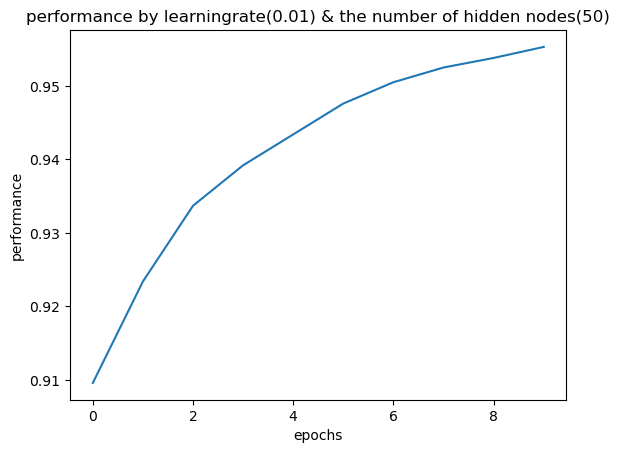

maximum performance: 0.9552955295529553 the epoch: 9


In [5]:
#입력값 넣기
ANN()

input hidden nodes30
input learning rate0.01
input epochs20
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


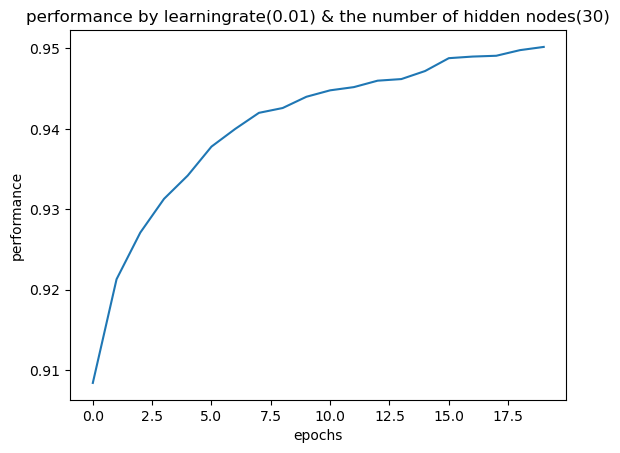

maximum performance: 0.9501950195019502 the epoch: 19


In [6]:
ANN()

input hidden nodes50
input learning rate0.01
input epochs30
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


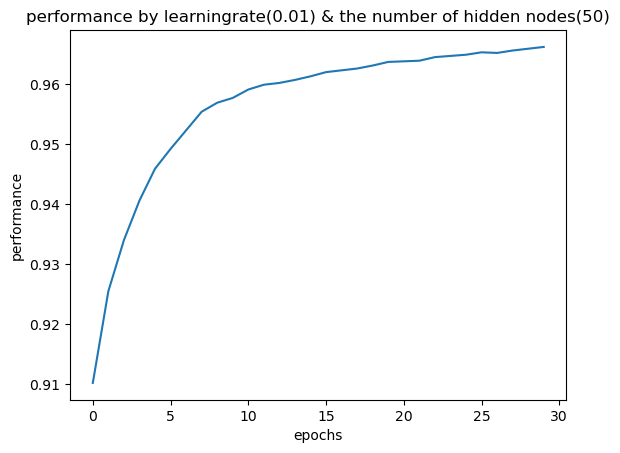

maximum performance: 0.9661966196619662 the epoch: 29


In [7]:
ANN()

input hidden nodes100
input learning rate0.01
input epochs100
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


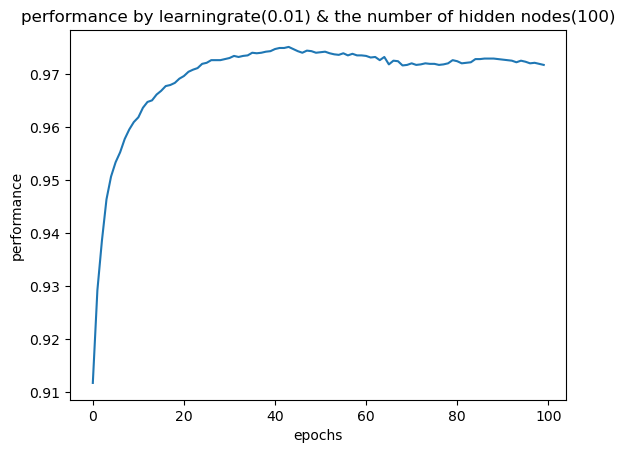

maximum performance: 0.9751975197519752 the epoch: 43


In [17]:
ANN()

input hidden nodes100
input learning rate0.01
input epochs40
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


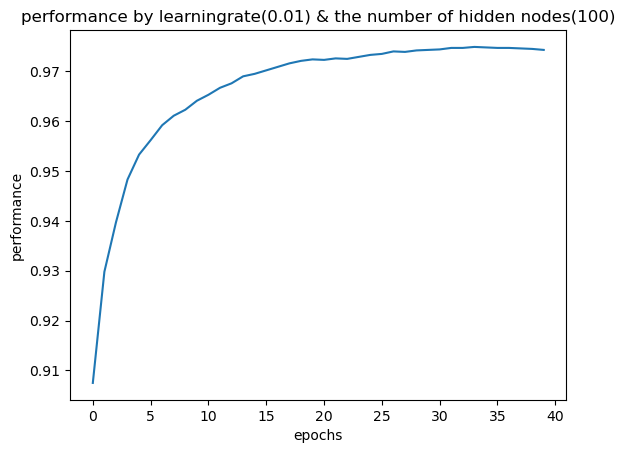

maximum performance: 0.9748974897489749 the epoch: 33


In [18]:
ANN()

In [36]:
# 새로운 자료 불러오기

new_test_data_file = pd.read_csv('mnist_exampledata1.csv') 

new_test_data_list = new_test_data_file.to_numpy()

#print(new_test_data_list.shape)

      7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0     2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1     1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2     0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3     4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4     1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
...  .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   
9994  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9995  3  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9996  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9997  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9998  6  0    0    0    0    0    0    0    0    0  ...      0      0      0   

      0.661  0.662  0.663  0.664  0.665

In [26]:
# 새로운 자료로 테스트(파라미터 입력)

inputnodes = 784
outputnodes = 10

#사전에 생성한 가중치 파일 이름에 맞게 입력
learning_rate = 0.01
hidden_nodes = 100

# 클래스에 다시 파라미터 투입
n = NN(inputnodes, hidden_nodes, outputnodes, learning_rate)

# 웨이트 불러오기
with open(f"wih_{learning_rate}_{hidden_nodes}", "rb") as file:
    n.wih = pickle.load(file) 
with open(f"who_{learning_rate}_{hidden_nodes}", "rb") as file:
    n.who = pickle.load(file)



In [27]:
# 새로운 자료로 성능 테스트
scorecard = []

for record in new_test_data_list:
    correct_label = record[0] 
    inputs = (record[1:] / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)

    label = numpy.argmax(outputs)

    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
    
#성능 출력
scorecard = numpy.asarray(scorecard) 
performance =  scorecard.sum() / scorecard.size
print(performance)


0.15371537153715373
